## Preprocess

#### Inputs: 
- GrowTimeSeries_BatteryLevel.csv
- GrowTimeSeries_SoilMoisture.csv
- GrowTimeSeries_Light.csv
- GrowTimeSeries_AirTemperature.csv
- GrowLocations

First 4 csv files are subsets of the original timeseries data for different sensors, header is the same

#### Output:
- ts_data_pp01.pkl: Preprocessed data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime as dt
import gc
import dask.dataframe as dd
from geopy import distance as gd

%matplotlib inline

In [16]:
col_types = {
    'sActualValue': np.float32
}

In [17]:
use_cols = ['Serial', 'Device', 'sActualValue', 'sTime']

##### Battery

In [4]:
df_bat = pd.read_csv('GrowTimeSeries_BatteryLevel.csv', dtype=col_types, usecols=use_cols, parse_dates=['sTime'])

In [3]:
df_bat

,Serial,Device,sActualValue,sTime
0,PI040298AD5G203425,Grow.Thingful.Sensors_fzja2fbn,100.0,2018-10-17 13:11:22+00:00
1,PI040298AD5G203425,Grow.Thingful.Sensors_fzja2fbn,100.0,2018-10-17 13:26:22+00:00
2,PI040298AD5G203425,Grow.Thingful.Sensors_fzja2fbn,100.0,2018-10-17 13:41:22+00:00
3,PI040298AD5G203425,Grow.Thingful.Sensors_fzja2fbn,100.0,2018-10-17 13:56:22+00:00
4,PI040298AD5J215142,Grow.Thingful.Sensors_5tjrqt1c,100.0,2018-10-17 13:14:07+00:00
...,...,...,...,...
29501150,PI040298AA4E057627,Grow.Thingful.Sensors_v5g5zde1,80.0,2019-10-30 14:33:29+00:00
29501151,PI040298AA4E057627,Grow.Thingful.Sensors_v5g5zde1,80.0,2019-10-30 14:48:29+00:00
29501152,PI040298AA4E057627,Grow.Thingful.Sensors_v5g5zde1,80.0,2019-10-30 15:03:29+00:00
29501153,PI040298AA4E057627,Grow.Thingful.Sensors_v5g5zde1,80.0,2019-10-30 15:18:29+00:00


In [5]:
df_bat['Datetime'] = df_bat.sTime.apply(lambda x: dt.datetime(x.year, x.month, x.day, x.hour, 0))

In [6]:
df_bat.Serial.isnull().sum()

23103

In [8]:
df_bat = df_bat[~df_bat.Serial.isnull()].copy()
gc.collect()

60

In [11]:
df_bat['Serial'] = df_bat.Serial.apply(lambda x: x[:18])

In [12]:
df_bat2 = df_bat.groupby(['Serial', 'Datetime']).sActualValue.mean().reset_index()

In [13]:
df_bat2.to_pickle('GrowTimeSeries_BatteryLevel.pkl')

In [14]:
del df_bat
del df_bat2

gc.collect()

121

#### Soil Moisture

In [8]:
df_moi = pd.read_csv('GrowTimeSeries_SoilMoisture.csv', dtype=col_types, usecols=use_cols, parse_dates=['sTime'])

In [13]:
df_moi['Datetime_h'] = df_moi.sTime.apply(lambda x: dt.datetime(x.year, x.month, x.day, x.hour, 0))

In [54]:
df_moi = df_moi[~df_moi.Serial.isnull()].copy()
gc.collect()

98701

In [56]:
df_moi['Serial'] = df_moi.Serial.apply(lambda x: x[:18])

In [62]:
df_moi2 = df_moi.groupby(['Serial', 'Datetime_h']).sActualValue.mean().reset_index()

In [232]:
df_moi2.to_pickle('GrowTimeSeries_SoilMoisture.pkl')

In [234]:
del df_moi2
gc.collect()

166327

In [235]:
del df_moi
gc.collect()

20

#### Light

In [18]:
df_lig = pd.read_csv('GrowTimeSeries_Light.csv', dtype=col_types, usecols=use_cols, parse_dates=['sTime'])

In [19]:
df_lig['Datetime'] = df_lig.sTime.apply(lambda x: dt.datetime(x.year, x.month, x.day, x.hour, 0))

In [20]:
df_lig.Serial.isnull().sum()

20751

In [21]:
df_lig = df_lig[~df_lig.Serial.isnull()].copy()
gc.collect()

40

In [22]:
df_lig['Serial'] = df_lig.Serial.apply(lambda x: x[:18])

In [23]:
df_lig2 = df_lig.groupby(['Serial', 'Datetime']).sActualValue.mean().reset_index()

In [24]:
df_lig2.to_pickle('GrowTimeSeries_Light.pkl')

In [25]:
del df_lig2
gc.collect()

80

In [26]:
del df_lig
gc.collect()

20

#### AirTemperature

In [27]:
df_tem = pd.read_csv('GrowTimeSeries_AirTemperature.csv', dtype=col_types, usecols=use_cols, parse_dates=['sTime'])

In [28]:
df_tem['Datetime'] = df_tem.sTime.apply(lambda x: dt.datetime(x.year, x.month, x.day, x.hour, 0))

In [29]:
df_tem.Serial.isnull().sum()

19713

In [30]:
df_tem = df_tem[~df_tem.Serial.isnull()].copy()
gc.collect()

40

In [31]:
df_tem['Serial'] = df_tem.Serial.apply(lambda x: x[:18])

In [32]:
df_tem2 = df_tem.groupby(['Serial', 'Datetime']).sActualValue.mean().reset_index()

In [33]:
df_tem2.to_pickle('GrowTimeSeries_AirTemperature.pkl')

In [34]:
del df_tem2
gc.collect()

80

In [35]:
del df_tem
gc.collect()

20

## Combine

In [2]:
df_moi = pd.read_pickle('GrowTimeSeries_SoilMoisture.pkl')

In [3]:
df_moi = df_moi.rename({'Datetime_h': 'Datetime'}, axis=1)

In [4]:
df_moi.shape

(7352512, 3)

In [5]:
df_tem = pd.read_pickle('GrowTimeSeries_AirTemperature.pkl')

In [6]:
df_tem.shape

(7374253, 3)

In [7]:
df_moi.columns

Index(['Serial', 'Datetime', 'sActualValue'], dtype='object')

In [8]:
df_moi = df_moi.rename({'sActualValue': 'Moisture'}, axis=1)

In [9]:
df_tem = df_tem.rename({'sActualValue': 'Temperature'}, axis=1)

In [10]:
df_moi = df_moi.set_index(['Serial', 'Datetime'])

df_tem = df_tem.set_index(['Serial', 'Datetime'])

In [12]:
df_all = df_moi.join(df_tem, how='outer')

In [14]:
((~df_all.Moisture.isnull()) & (~df_all.Temperature.isnull())).sum()

3489552

In [15]:
df_all.shape

(11237213, 2)

In [16]:
df_all

Moisture  Temperature
Serial             Datetime                                   
PI040290AA00000000 2019-07-31 09:00:00        NaN    28.150000
                   2019-07-31 10:00:00        NaN    28.542500
                   2019-07-31 11:00:00        NaN    28.987499
                   2019-07-31 12:00:00        NaN    28.485001
                   2019-07-31 13:00:00        NaN    28.220001
...                                           ...          ...
PPI040297AD5I20567 2019-09-22 11:00:00  31.582500          NaN
                   2019-09-22 12:00:00  31.525000          NaN
                   2019-09-22 13:00:00  31.182501          NaN
                   2019-09-22 14:00:00  31.250000          NaN
                   2019-09-22 15:00:00  31.280001          NaN

[11237213 rows x 2 columns]

In [21]:
(~(df_all.Moisture + df_all.Temperature).isnull()).sum()

3489552

In [22]:
del df_tem, df_moi
gc.collect()

180

In [23]:
df_lig = pd.read_pickle('GrowTimeSeries_Light.pkl')

In [24]:
df_lig = df_lig.rename({'sActualValue': 'Light'}, axis=1)

In [25]:
df_lig = df_lig.set_index(['Serial', 'Datetime'])

In [26]:
df_all = df_all.join(df_lig, how='outer')

In [27]:
del df_lig
gc.collect()

20

In [28]:
df_bat = pd.read_pickle('GrowTimeSeries_BatteryLevel.pkl')

In [29]:
df_bat = df_bat.rename({'sActualValue': 'Battery'}, axis=1)

In [30]:
df_bat = df_bat.set_index(['Serial', 'Datetime'])

In [31]:
df_all = df_all.join(df_bat, how='outer')

In [36]:
df_all = df_all.reset_index()

In [37]:
df_all = df_all.sort_values(['Serial', 'Datetime'])

In [38]:
df_all = df_all.reset_index()

In [42]:
del df_all['index']

### Remove data that has no locations

In [ ]:
# df_all = pd.read_pickle('../data/GrowTimeSeries_CombinedHourly_Moistures.pkl')

In [3]:
df_loc = pd.read_csv('../data/GrowLocations.csv')

In [4]:
df_loc = df_loc[~df_loc.Serial.isnull()].copy()
gc.collect()

7

In [4]:
df_loc['Serial'] = df_loc.Serial.apply(lambda x: x[:18])

In [5]:
from matplotlib_venn import venn2

In [ ]:
serials_ts = df_all.Serial.unique()
serials_loc = df_loc.Serial.unique()

In [ ]:
len(serials_ts), len(serials_loc)

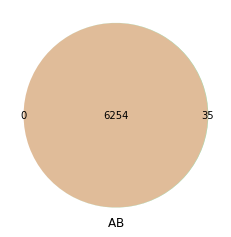

In [39]:
venn2([set(serials_ts), set(serials_loc)]);

In [43]:
df_all.to_pickle('GrowTimeSeries_CombinedHourly.pkl')

#### Remove null moistures

In [7]:
df_all = pd.read_pickle('../data/GrowTimeSeries_CombinedHourly.pkl')

In [8]:
df_all.Moisture.isnull().sum()

7824839

In [9]:
df_all2 = df_all[~df_all.Moisture.isnull()].copy()

In [10]:
df_all.shape, df_all2.shape

((15177351, 6), (7352512, 6))

#### Add location info

In [14]:
ds_nlocs = df_loc.groupby('Serial')[['Latitude', 'Longitude']].apply(lambda dfnow: dfnow.drop_duplicates().shape[0])

serials_multiloc = list(ds_nlocs[ds_nlocs>1].index)

In [15]:
len(serials_multiloc)

190

In [16]:
df_all2 = df_all2[~df_all2.Serial.isin(serials_multiloc)].copy()
gc.collect()

78

In [18]:
df_all2.shape, df_all2.Serial.nunique()

((7122491, 6), 5750)

In [22]:
df_loc2 = df_loc[~df_loc.Serial.isin(serials_multiloc)].copy().drop_duplicates('Serial')

In [23]:
df_loc2.shape

(6099, 8)

In [24]:
(~df_all2.Serial.isin(df_loc2.Serial.unique())).sum()

0

In [43]:
df_loc3 = df_loc2.drop_duplicates(['Latitude', 'Longitude']).reset_index(drop=True)

In [45]:
df_loc3['LocId'] = df_loc3.index

In [49]:
df_loc2 = df_loc2.join(df_loc3.set_index(['Latitude', 'Longitude'])['LocId'], ['Latitude', 'Longitude'])

In [50]:
df_loc2.LocId.nunique()

2076

In [52]:
df_all2 = df_all2.join(df_loc2.set_index('Serial')[['Latitude', 'Longitude', 'LocId']], 'Serial')

In [53]:
df_all2.shape, df_all2.LocId.nunique()

((7122491, 9), 2019)

In [4]:
del df_all2['Serial']

In [6]:
df_all2.drop_duplicates(['Latitude', 'Longitude']).shape[0]

2019

In [15]:
df_all2 = df_all2.groupby(['LocId', 'Datetime']).mean().reset_index()

In [19]:
df_all2.LocId.nunique()

2019

#### Remove locations which have less than 48 hours of data

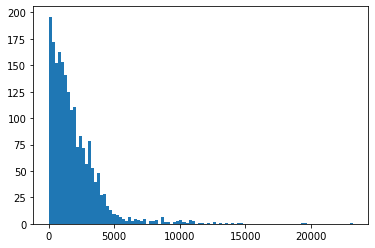

In [17]:
plt.hist(df_all2.groupby('LocId').LocId.count(), bins=100);

In [22]:
(df_all2.groupby('LocId').LocId.count()>48).sum()

1963

In [23]:
min_count = 48

In [25]:
dstmp = df_all2.groupby('LocId').LocId.count()
locs_drop = dstmp[dstmp < min_count].index
df_all2 = df_all2[~df_all2.LocId.isin(locs_drop)]

In [27]:
df_all2.shape, df_all2.LocId.nunique()

((3983541, 8), 1964)

#### Remove Locations which have 0 Moisture value at least for one hour

In [29]:
(df_all2.Moisture == 0).sum()

179529

In [30]:
df_all2['ZeroMoist'] = df_all2.Moisture == 0

In [32]:
(df_all2.groupby('LocId').ZeroMoist.sum() == 0).sum()

1388

In [37]:
dstmp = df_all2.groupby('LocId').ZeroMoist.sum()
locs_keep = dstmp[dstmp==0].index
df_all2 = df_all2[df_all2.LocId.isin(locs_keep)]

In [38]:
df_all2.shape, df_all2.LocId.nunique()

((2348080, 9), 1388)

#### Latitude and Longitude are switched in the original dataset, switch them back

In [4]:
dstmp = df_all2['Latitude'].copy()
df_all2['Latitude'] = df_all2['Longitude'].copy()
df_all2['Longitude'] = dstmp

In [5]:
df_all2.to_pickle('../data/ts_data_pp01.pkl')

In [55]:
df_all2.columns

Index(['Serial', 'Datetime', 'Moisture', 'Temperature', 'Light', 'Battery',
       'Latitude', 'Longitude', 'LocId'],
      dtype='object')

#### Check for serials that has multiple location coordinates

In [51]:
df_all3 = df_all2.join(df_loc.set_index('Serial')[['Latitude', 'Longitude']], 'Serial')

In [55]:
df_all3.Serial.nunique(), df_all3.drop_duplicates(['Serial', 'Latitude', 'Longitude']).shape[0]

(5933, 6123)

In [56]:
df_all3.groupby('Serial').Latitude.nunique()

Serial
PI040290AA00000000    1
PI040297AA3I001108    3
PI040297AA3J001403    1
PI040297AA3J001785    1
PI040297AA3J001991    1
                     ..
PI040307AD5I204915    1
PI040307AD5I204924    1
PI040307AD5I204927    1
PI040307AD5I204938    1
PPI040297AD5I20567    1
Name: Latitude, Length: 5933, dtype: int64

In [61]:
df_all3[df_all3.Serial == 'PI040297AA3I001108'].groupby(['Latitude', 'Longitude']).Light.count()

Latitude  Longitude
0.000     0.000        3930
19.813    48.004       7860
19.817    48.015       3930
Name: Light, dtype: int64

In [59]:
df_loc[df_loc.Latitude == 0].Serial.nunique()

904

In [62]:
df_all3[df_all3.Latitude == 0].Serial.nunique()

837

In [63]:
df_all3.Serial.nunique()

5933

In [76]:
print(((df_loc.Latitude != 0) & (df_loc.Longitude == 0)).sum())
print(((df_loc.Latitude == 0) & (df_loc.Longitude != 0)).sum())

0
0


In [77]:
df_loc = df_loc[df_loc.Latitude != 0].copy()
gc.collect()

4494

In [78]:
df_loc.shape

(33702, 8)

In [79]:
ds_nlocs = df_loc.groupby('Serial')[['Latitude', 'Longitude']].apply(lambda dfnow: dfnow.drop_duplicates().shape[0])

serials_multiloc = list(ds_nlocs[ds_nlocs>1].index)

In [81]:
len(serials_multiloc)

119

In [85]:
ds_nlocs.value_counts()

1    5341
2     116
3       3
dtype: int64

In [89]:
df_loc_multiloc = df_loc[df_loc.Serial.isin(serials_multiloc)].drop_duplicates(['Serial', 'Latitude','Longitude'])

In [99]:
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
gd.distance(newport_ri, cleveland_oh).km

866.4554329098684

In [102]:
def get_max_dist(dff):
    
    nrows = dff.shape[0]
    
    dist = 0
    
    for i in range(nrows):
        l1 = (dff.iloc[i].Latitude, dff.iloc[i].Longitude)
        for j in range(i, nrows):
            l2 = (dff.iloc[j].Latitude, dff.iloc[j].Longitude)
            dist = max(dist, gd.distance(l1, l2).km)
            
    return dist

In [117]:
df_loc_multiloc = df_loc_multiloc.set_index('Serial', drop=True)

In [118]:
df_loc_multiloc['MaxDist'] = df_loc_multiloc.groupby('Serial')[['Latitude', 'Longitude']].apply(get_max_dist)

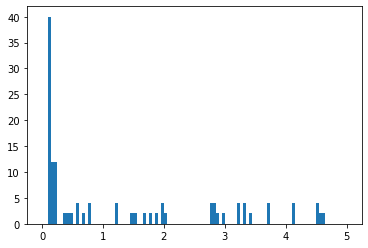

In [125]:
plt.hist(df_loc_multiloc['MaxDist'], bins=100, range=[0,5]);

In [48]:
df_all2.to_pickle('../data/GrowTimeSeries_CombinedHourly_Moistures.pkl')

In [5]:
((~df_all['Moisture'].isnull()) & (~df_all['Temperature'].isnull()) & (~df_all['Light'].isnull()) & \
    (~df_all['Battery'].isnull())).sum()

1384433

In [6]:
((~df_all['Moisture'].isnull()) & (~df_all['Temperature'].isnull()) & (~df_all['Light'].isnull()) ).sum()

1993565

In [7]:
df_all[['Moisture', 'Temperature', 'Light', 'Battery']].mean()

Moisture       22.927435
Temperature    17.156536
Light          12.318229
Battery        73.947433
dtype: float32

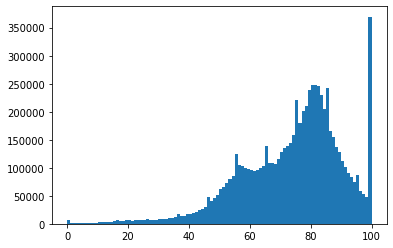

In [9]:
plt.hist(df_all.Battery, bins=100);

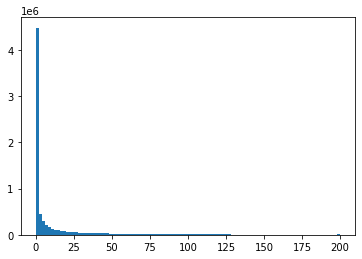

In [10]:
plt.hist(df_all.Light, bins=100);

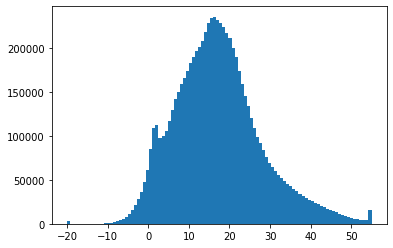

In [11]:
plt.hist(df_all.Temperature, bins=100);